# Plot common triple distribution

mode: default
average common triples: 6.000
mode: clock
average common triples: 6.000
mode: circ
average common triples: 5.999
mode: circ_clock
average common triples: 5.999
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.00032003e-05 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.00016001e-04 1.60012801e-04]
 [3.20038405e-04 3.60057609e-04 7.20057605e-04 1.12008961e-03]
 [9.99679962e-01 9.99639942e-01 9.99039923e-01 9.98719898e-01]]
[1. 1. 1. 1.]


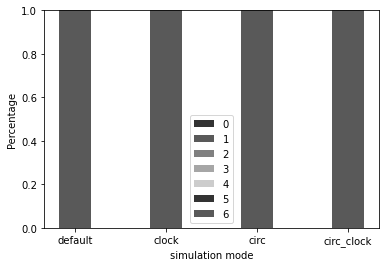

In [2]:
# Plot Common triple distribution
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from cycler import cycler

colors = plt.cm.gray(np.linspace(0.2,0.8,5))
plt.rcParams['axes.prop_cycle'] = cycler(color=colors)

plt.rcParams.update({
    "figure.facecolor":  (1.0, 1.0, 1.0, 1.0),  
    "axes.facecolor":    (1.0, 1.0, 1.0, 1.0),  
    "savefig.facecolor": (1.0, 1.0, 1.0, 1.0),
})


N = 10
modes = ['default', 'clock', 'circ', 'circ_clock']
tally = np.zeros((N-3, 4))
for index, mode in enumerate(modes):
  basepath = f'./simulations/N{N}/{mode}'
  outdir = f'{basepath}/results/wp3.1_4_leaves'
  print(f'mode: {mode}')
  common_triple = pickle.load(open(f'{outdir}/common_triple', 'rb'))
  print(f'average common triples: {np.mean(common_triple):.3f}')

  for num_common_triple in range(0, N-3):
    #print(common_triple)
    tally[num_common_triple, index] = np.sum(np.array(common_triple) == num_common_triple)/len(common_triple)

print(tally)
for i in range(0, N-3):
  if i == 0:
    plt.bar(modes, tally[i], width=0.35, label=i)
  else:
    plt.bar(modes, tally[i], width=0.35, label=i, bottom=np.sum(tally[:i], axis=0))

print(np.sum(tally, axis=0))
plt.legend()
plt.ylabel('Percentage')
plt.xlabel('simulation mode')
plt.ylim((0,1.0))
plt.savefig('N10.3_1_4leaves.png', dpi=300)

mode: default
average common triples: 1.330
(array([0, 1, 2]), array([ 1964, 12817, 10219]))
mode: clock
average common triples: 1.330
(array([0, 1, 2]), array([ 1925, 12890, 10185]))
mode: circ
average common triples: 0.964
(array([0, 1, 2]), array([ 5614, 14684,  4702]))
mode: circ_clock
average common triples: 0.959
(array([0, 1, 2]), array([ 5717, 14585,  4698]))


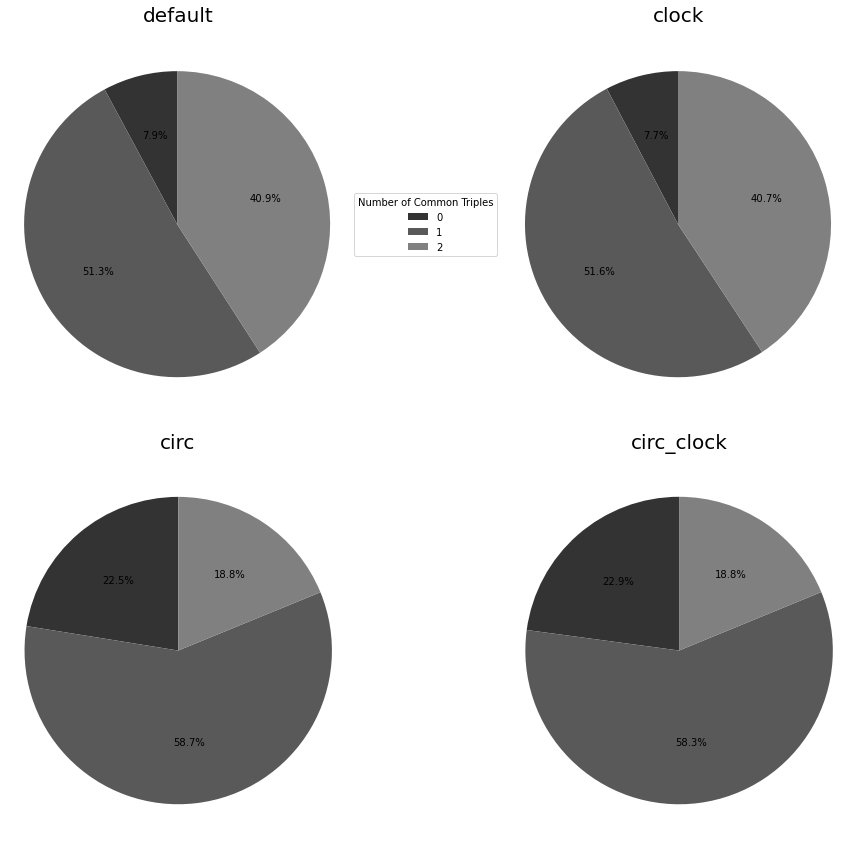

In [4]:
# Plot Common triple distribution
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from cycler import cycler

colors = plt.cm.gray(np.linspace(0.2,0.8,5))
plt.rcParams['axes.prop_cycle'] = cycler(color=colors)


plt.rcParams.update({
    "figure.facecolor":  (1.0, 1.0, 1.0, 1.0),  
    "axes.facecolor":    (1.0, 1.0, 1.0, 1.0),  
    "savefig.facecolor": (1.0, 1.0, 1.0, 1.0),
})

fig, axs = plt.subplots(2, 2, figsize=(12, 12), tight_layout=True)


for index, mode in enumerate(['default', 'clock', 'circ', 'circ_clock']):
    i, j = index//2, index%2
    basepath = f'./simulations/N6/{mode}'
    outdir = f'{basepath}/results/wp4'
    print(f'mode: {mode}')
    common_triple = pickle.load(open(f'{outdir}/common_triple', 'rb'))
    print(f'average common triples: {np.mean(common_triple):.3f}')

    counts = np.unique(common_triple, return_counts=True)
    print(counts)
    wedges, texts, autotexts = axs[i,j].pie(counts[1], autopct='%1.1f%%', startangle=90)
    axs[i,j].axis('equal')
    axs[i,j].set_title(mode, fontsize=20)
    if i == 0 and j == 0:
        axs[i,j].legend(wedges, counts[0],
          title="Number of Common Triples",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.savefig('N6.wp4.png')

# Percent of Initial Quad Recovered